In [1]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import string
import pandas as pd
import warnings
import demoji
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

warnings.filterwarnings("ignore")
df = pd.read_csv("C:/ML/python/data/vaccination_tweets.csv",delimiter=',')
df.head(10)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\katsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [2]:
def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub(r'<.*?>', '',text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)

    text = demoji.replace(text,'')

    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    text = re.sub(r'\@w+|\#','',text)
    

    
    
    return text


df['text'] = df['text'].apply(clean_text)
df['text'].head(10)

0    same folks said daikon paste could treat a cyt...
1    while the world has been on the wrong side of ...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    facts are immutable senator even when youre no...
4    explain to me again why we need a vaccine bori...
5    does anyone have any useful adviceguidance for...
6    it is a bit sad to claim the fame for success ...
7    there have not been many bright days in 2020 b...
8    covid vaccine you getting it\n\n covidvaccine ...
9    covidvaccine \n\nstates will start getting cov...
Name: text, dtype: object

In [3]:

sw = set(stopwords.words("english"))


def remove_stopwords(text):
    tokens = word_tokenize(text)
    cleaned_tokens = [word for word in tokens if word.lower() not in sw]
    return " ".join(cleaned_tokens)

df['text'] = df['text'].apply(remove_stopwords)
df['text'].head(10)

0    folks said daikon paste could treat cytokine s...
1    world wrong side history year hopefully bigges...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    facts immutable senator even youre ethically s...
4    explain need vaccine borisjohnson matthancock ...
5    anyone useful adviceguidance whether covid vac...
6    bit sad claim fame success vaccination patriot...
7    many bright days 2020 best 1 bidenharris winni...
8    covid vaccine getting covidvaccine covid19 pfi...
9    covidvaccine states start getting covid19vacci...
Name: text, dtype: object

In [4]:
from nltk.stem import SnowballStemmer



snow_ball = SnowballStemmer("english")


def stem_text(text):
    tokens = word_tokenize(text)
    stem_tokens = [snow_ball.stem(token) for token in tokens]
    return " ".join(stem_tokens)


df['text'] = df['text'].apply(stem_text)
df['text'].head(10)

0    folk said daikon past could treat cytokin stor...
1    world wrong side histori year hope biggest vac...
2    coronavirus sputnikv astrazeneca pfizerbiontec...
3    fact immut senat even your ethic sturdi enough...
4    explain need vaccin borisjohnson matthancock w...
5    anyon use adviceguid whether covid vaccin safe...
6    bit sad claim fame success vaccin patriot comp...
7    mani bright day 2020 best 1 bidenharri win ele...
8    covid vaccin get covidvaccin covid19 pfizerbio...
9    covidvaccin state start get covid19vaccin mond...
Name: text, dtype: object

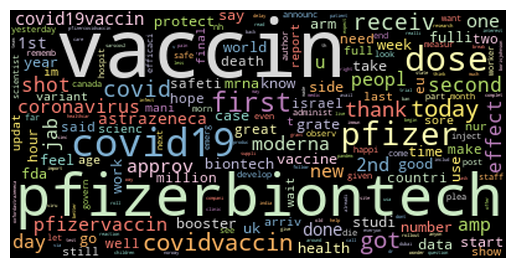

In [5]:
text = " ".join(i for i in df['text'])

from wordcloud import WordCloud
import matplotlib.pyplot as plt


wc = WordCloud(colormap='Set3',collocations=False).generate(text)
plt.imshow(wc,interpolation="blackman")
plt.axis("off")
plt.show()


In [6]:
####lame


from textblob import TextBlob

blob = TextBlob(text)

from nltk.probability import FreqDist

vac_dis = FreqDist(blob.words)
top_50_most_used_words = vac_dis.most_common(50)
print("top 50 most used words",top_50_most_used_words)



top 50 most used words [('vaccin', 6461), ('pfizerbiontech', 6104), ('covid19', 2449), ('dose', 1968), ('pfizer', 1552), ('’', 1247), ('first', 1179), ('today', 842), ('covidvaccin', 829), ('get', 818), ('got', 795), ('receiv', 712), ('covid', 701), ('thank', 630), ('second', 565), ('shot', 552), ('effect', 545), ('approv', 470), ('moderna', 464), ('amp', 462), ('day', 441), ('peopl', 433), ('2nd', 431), ('coronavirus', 410), ('pfizervaccin', 406), ('one', 404), ('jab', 398), ('done', 373), ('covid19vaccin', 369), ('2', 350), ('1st', 336), ('us', 331), ('astrazeneca', 330), ('pfizerbiontech…', 317), ('feel', 308), ('use', 304), ('new', 298), ('week', 285), ('fda', 268), ('protect', 266), ('1', 253), ('say', 248), ('uk', 239), ('side', 237), ('health', 229), ('fulli', 228), ('the…', 225), ('like', 225), ('work', 225), ('studi', 224)]


<Axes: ylabel='count'>

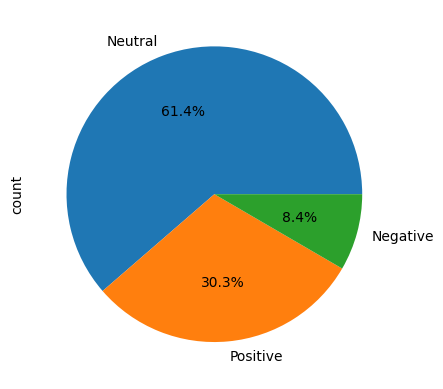

In [7]:
def polarity(text):
    return TextBlob(text).polarity



df['polarity'] = df['text'].apply(polarity)



def sentiment(label):
    if label <0:
        return "Negative"
    elif label == 0:
        return "Neutral"
    elif label >= 0:
        return "Positive"


df['sentiment'] = df['polarity'].apply(sentiment)

df['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%')


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = df['text']
X = cv.fit_transform(X).toarray()
y = df['sentiment']
y = le.fit_transform(y)


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=42)



from sklearn.linear_model import LogisticRegression,PassiveAggressiveClassifier

lr = LogisticRegression()
PA = PassiveAggressiveClassifier()


from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

GNB = GaussianNB()
BNB = BernoulliNB()
MNB = MultinomialNB()

from sklearn.metrics import accuracy_score,classification_report


def evaluate_model(X_train,X_test,y_train,y_test,model):
    model = model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    clf_rpt = classification_report(y_test,pred)
    print(f'{model.__class__.__name__}, --Accuracy-- {acc*100:.2f}%; --Classification Report-- {clf_rpt}')
    return pred


lr_pred = evaluate_model(X_train, X_test, y_train, y_test, lr)
PA_pred = evaluate_model(X_train, X_test, y_train, y_test, PA)
GNB_pred = evaluate_model(X_train, X_test, y_train, y_test, GNB)
BNB_pred = evaluate_model(X_train, X_test, y_train, y_test, BNB)
MNB_pred = evaluate_model(X_train, X_test, y_train, y_test, MNB)


LogisticRegression, --Accuracy-- 92.56%; --Classification Report--               precision    recall  f1-score   support

           0       0.91      0.55      0.68       193
           1       0.91      0.99      0.95      1326
           2       0.96      0.90      0.93       685

    accuracy                           0.93      2204
   macro avg       0.93      0.81      0.85      2204
weighted avg       0.93      0.93      0.92      2204

PassiveAggressiveClassifier, --Accuracy-- 95.33%; --Classification Report--               precision    recall  f1-score   support

           0       0.91      0.74      0.81       193
           1       0.95      0.99      0.97      1326
           2       0.96      0.93      0.95       685

    accuracy                           0.95      2204
   macro avg       0.94      0.89      0.91      2204
weighted avg       0.95      0.95      0.95      2204

GaussianNB, --Accuracy-- 44.01%; --Classification Report--               precision    recall  f

In [9]:
X = df['text']
y = df['sentiment']
y = le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Embedding,SpatialDropout1D,Bidirectional,Dropout

from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print(len(word_index))

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)



max_length = 0
for sequence in X_train:
    sequence_length = len(sequence)
    if sequence_length > max_length:
        max_length = sequence_length

print("Max Length of Sequences: ",max_length)

14058
Max Length of Sequences:  22


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6433 - loss: 0.8389 - val_accuracy: 0.8629 - val_loss: 0.4031
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9010 - loss: 0.2666 - val_accuracy: 0.9029 - val_loss: 0.3044
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9534 - loss: 0.1488 - val_accuracy: 0.9013 - val_loss: 0.3111
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9718 - loss: 0.1028 - val_accuracy: 0.8783 - val_loss: 0.4298
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9792 - loss: 0.0755 - val_accuracy: 0.9152 - val_loss: 0.3213
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9870 - loss: 0.0528 - val_accuracy: 0.9152 - val_loss: 0.3193
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9901 - loss: 0.0429 - val_accuracy: 0.9370 - val_loss: 0.2938
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9913 - loss: 0.0356 - val_accurac

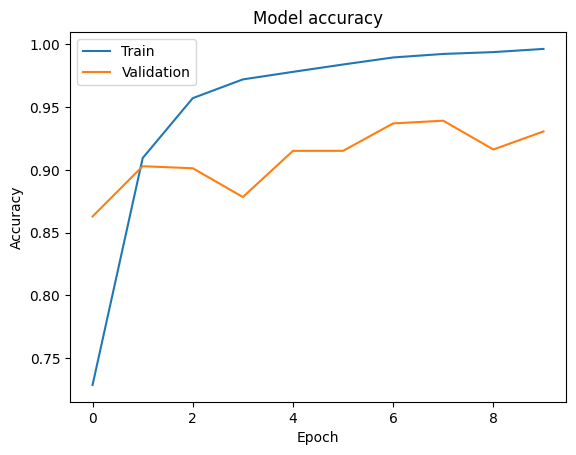

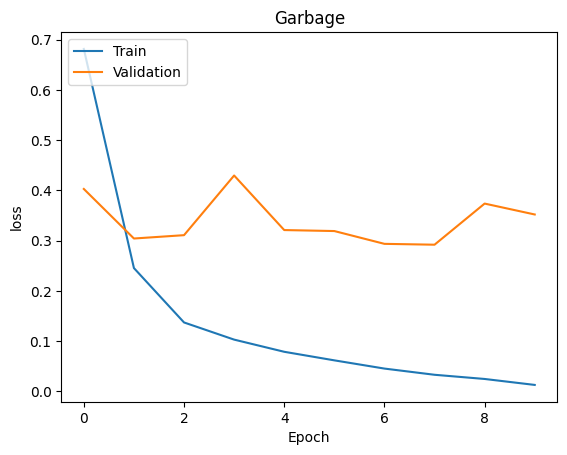

In [10]:
from tensorflow.keras.utils import pad_sequences,to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

X_train = pad_sequences(X_train,padding='post')
X_test = pad_sequences(X_test,padding="post")


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,SpatialDropout1D,Dropout

RNN = Sequential()
RNN.add(Embedding(input_dim=(len(word_index)+1),output_dim=100,input_length=max_length))
RNN.add(SpatialDropout1D(0.2))
RNN.add(LSTM(50,dropout=0.1,recurrent_dropout=0.1))
RNN.add(Dropout(0.1))
RNN.add(Dense(50,activation='relu'))
RNN.add(Dropout(0.1))
RNN.add(Dense(3,activation='softmax'))
RNN.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = RNN.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)
print(max(history.history['accuracy']))



plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()




plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Garbage')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()



from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()


tfidf_vectors = tfidf_vectorizer.fit_transform(df['text'])


tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=tfidf_vectorizer.get_feature_names_out())




import pickle


with open('vacination.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)


RNN.save('vaccination_model.h5')

In [12]:
from sklearn.metrics import roc_auc_score

pred_prob = RNN.predict(X_test)
roc = roc_auc_score(y_test,pred_prob)
print(f"roc score: {roc*100:.2f}%")


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
roc score: 97.21%
